In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Data description

Dataset of 550 000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 1. Non-empty and distinct values for each column

In [3]:
d = pd.DataFrame(index=df.columns, columns=['Not_null', 'Distinct', 'Type'])
for col in d.index:
    d.loc[col]=[df[col].count(),len(df[col].unique()), type(df[col][1])]
print(d) 


                           Not_null Distinct                     Type
User_ID                      537577     5891    <class 'numpy.int64'>
Product_ID                   537577     3623            <class 'str'>
Gender                       537577        2            <class 'str'>
Age                          537577        7            <class 'str'>
Occupation                   537577       21    <class 'numpy.int64'>
City_Category                537577        3            <class 'str'>
Stay_In_Current_City_Years   537577        5            <class 'str'>
Marital_Status               537577        2    <class 'numpy.int64'>
Product_Category_1           537577       18    <class 'numpy.int64'>
Product_Category_2           370591       18  <class 'numpy.float64'>
Product_Category_3           164278       16  <class 'numpy.float64'>
Purchase                     537577    17959    <class 'numpy.int64'>


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


## 2. Users and products
5891 different customers bought 3623 distinct products.

Database contains over 500 000 transactions.

In [3]:
df2 = df.groupby('User_ID')['Product_ID'].agg('size')

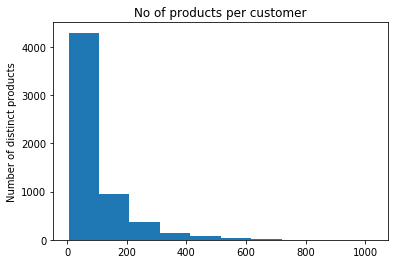

In [4]:
plt.hist(df2)
plt.title('No of products per customer')
plt.ylabel('Number of distinct products')
plt.show()

In [8]:
df2.describe()

count    5891.000000
mean       91.253947
std       105.929800
min         5.000000
25%        25.000000
50%        53.000000
75%       114.000000
max      1025.000000
Name: Product_ID, dtype: float64

### Customers
Minimal number of bought products is 5. The maximum is 1025.

The mean equals 91 and the median is much lower - 53.

In [9]:
df3 = df.groupby('Product_ID')['User_ID'].agg('size')
df3.describe()

count    3623.000000
mean      148.378968
std       208.176730
min         1.000000
25%        19.000000
50%        70.000000
75%       192.000000
max      1858.000000
Name: User_ID, dtype: float64

### Products

Most popular product was bought by 1858 times. 

In [10]:
df.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

#### Product aggregates

In [3]:
df_prod = pd.DataFrame(index=df.Product_ID.unique(), columns=['no_trans','min_purch', 'max_purch', 'price_diff', 'price_ratio', 'no_women', 'no_men'])

In [4]:
for (Product_ID, group) in df.groupby('Product_ID'):
     df_prod.loc[Product_ID] = [group.Gender.count(), group.Purchase.min(), group.Purchase.max(),group.Purchase.max()-group.Purchase.min(), round(group.Purchase.max()/group.Purchase.min(),0), len(group.Gender[group.Gender=='F']), len(group.Gender[group.Gender!='F'])]


In [14]:
df_prod.head(10)

,no_trans,min_purch,max_purch,price_diff,price_ratio,no_women,no_men,women_rank,men_rank
P00069042,221,2648,13716,11068,5,57,164,58.0,165.0
P00248942,570,3880,19701,15821,5,136,434,137.0,391.0
P00087842,99,346,1776,1430,5,54,45,55.0,46.0
P00085442,334,365,1778,1413,5,158,176,158.0,177.0
P00285442,200,3920,10073,6153,3,51,149,52.0,150.0
P00193542,606,3828,19698,15870,5,112,494,113.0,426.0
P00184942,1424,3809,19707,15898,5,293,1131,229.0,539.0
P00346142,586,3847,19698,15851,5,73,513,74.0,440.0
P0097242,896,3936,19708,15772,5,172,724,172.0,501.0
P00274942,782,1940,10082,8142,5,140,642,141.0,489.0


In [5]:
df_prod['women_rank']=df_prod.no_women.rank(method='dense')
df_prod['men_rank']=df_prod.no_men.rank(method='dense')

df_prod['women_rank']=df_prod['women_rank'] / df_prod['women_rank'].max()
df_prod['men_rank']=df_prod['men_rank']/df_prod['men_rank'].max()

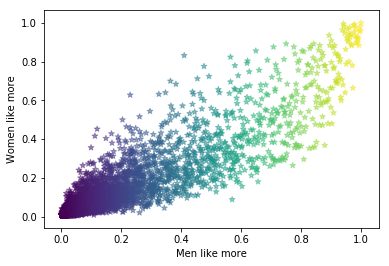

In [6]:

N = len(df_prod.men_rank)
x = df_prod.men_rank
y = df_prod.women_rank
#colors = df_prod.men_rank/df_prod.women_rank
colors = 100*df_prod.men_rank
plt.scatter(x, y, marker='*', c=colors, alpha=0.5)
plt.xlabel('Men like more')
plt.ylabel('Women like more')
plt.show()

### Gender

In [7]:
pl_data = df.groupby('Gender')['Purchase'].agg(['count', 'sum'])
pl_data


,count,sum
Gender,,
F,132197,1164624021
M,405380,3853044357


In [10]:
pl_data['count']

Gender
F    132197
M    405380
Name: count, dtype: int64

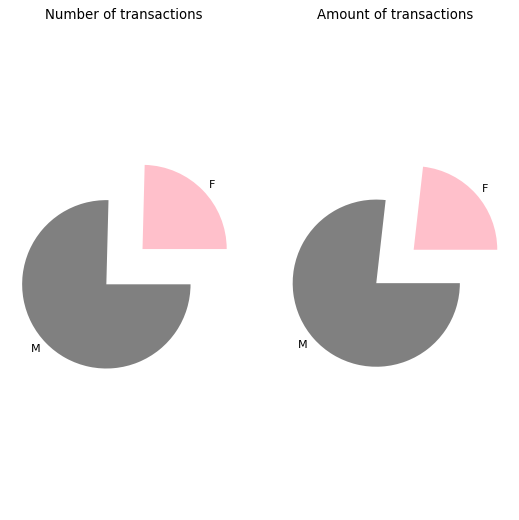

In [43]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.pie(pl_data['count'], labels = pl_data.index, explode=[0.5, 0.1], startangle = 0, colors=['pink', 'gray'], )
plt.title('Number of transactions')
plt.axis('equal')

plt.subplot(1,2,2)
plt.pie(pl_data['sum'], labels = pl_data.index, explode=[0.5, 0.1], startangle = 0, colors=['pink', 'gray'])
plt.title('Amount of transactions')
plt.axis('equal')

plt.show()